In [1]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Mounted at /content/ggdrive


#Đọc dữ liệu

In [18]:
import pandas as pd
df = pd.read_csv('/content/ggdrive/MyDrive/Data Analyst/Python/Project/housing_ca.csv')
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Khám phá dữ liệu**:
Block là 1 đơn vị hành chính nhỏ nhất ở US, với số dân thường từ 600 to 3000 người
* longitude, latitude: kinh độ, vĩ độ. Có thể dùng map để hiển thị
* housing_median_age: tuổi trung vị của các ngôi nhà trong 1 block. Số này càng nhỏ, các ngôi nhà càng mới
* total_rooms: số phòng trong 1 block
* total_bedrooms: số phòng ngủ trong 1 block
* population: số người sống trong 1 block. Cùng với 2 trường trước đó, có thể tính ra mật độ dân cư
* households: số hộ gia đình trong 1 block
* median_income: thu nhập trung vị của các hộ gia đình trong 1 khối (đơn vị là 10 nghìn USD)
* median_house_value: giá nhà trung vị trong 1 block (đơn vị là USD)

Sơ bộ khả năng: đều là các trường thông tin nhiều ý nghĩa, có giá trị cao
* Có thể xây dựng mô hình dự đoán giá nhà (KNN)
* Phân nhóm các hộ gia đình theo 1 hoặc nhiều tiêu chí gì đó (K-means)
* Phân tích mật độ dân cư, so sánh với thu nhập, trực quan hóa trên bản đồ, ... (Phân tích chuyên sâu)

#Thống kê

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Clean data

In [20]:
#check duplicate
df.duplicated().sum()

0

In [21]:
#check null
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Một vài quan sát với tập dữ liệu:
* Chất lượng dữ liệu tốt. Không có dữ liệu lặp. Hầu hết đều có đầy đủ giá trị, trừ cột total_bedrooms
* Cột total_bedrooms có 207 giá trị null ở đây. Số lượng không nhiều. Tùy theo nhu cầu phân tích xử lý dữ liệu, có thể xóa, hoặc có thể điền giá trị trung bình, trung vị, hoặc dùng KNN để dự đoán giá trị, dựa theo các cột thông tin khác
* Cột total_rooms, total_bedrooms, population và median_income có giá trị lớn nhất vượt xa phân vị thứ ba (75%) của các cột đó.
* Cột median_house_value có khoảng biến thiên không cao, P75 cũng gần với min, max. Có thể dữ liệu này đã được xử lý ngoại lệ. Những hộ gia đình có thu nhập quá cao đã bị loại bỏ



Với dữ liệu dạng hạng mục duy nhất là cột ocean_proximity, dùng phương thức value_counts.

In [22]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Quan sát thấy rằng phần lớn các giá trị nằm trong mục <1H OCEAN tức khoảng cách tới biển là nhỏ hơn 1h. Trong khi đó, chỉ có 5 giá trị bằng ISLAND tức ngoài đảo.

# Phân bố dữ liệu

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

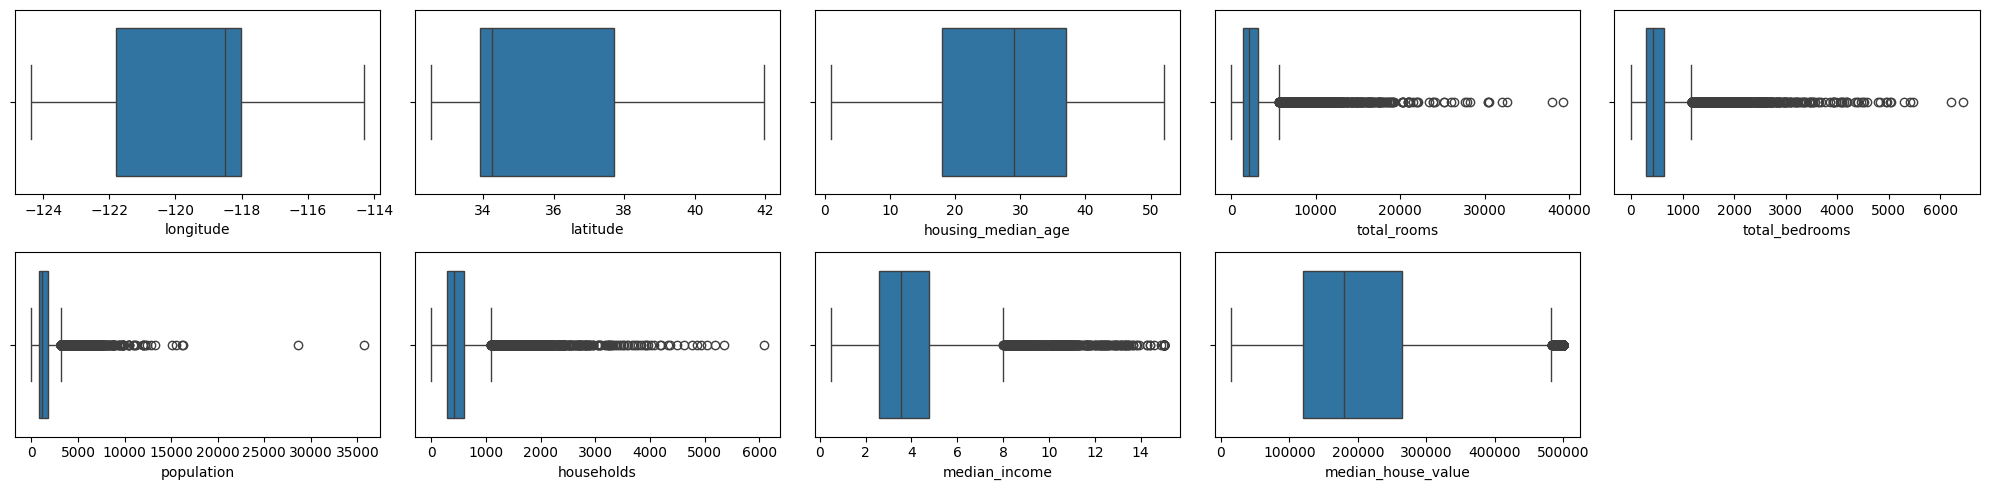

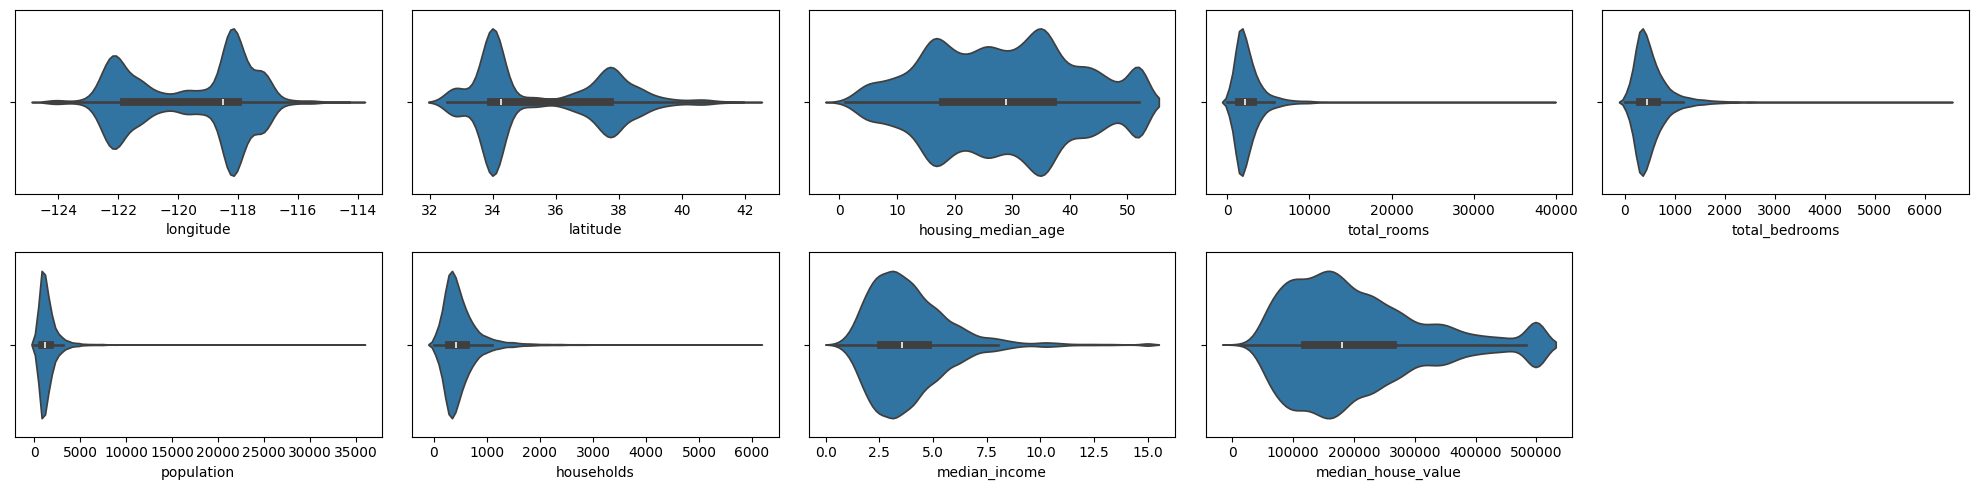

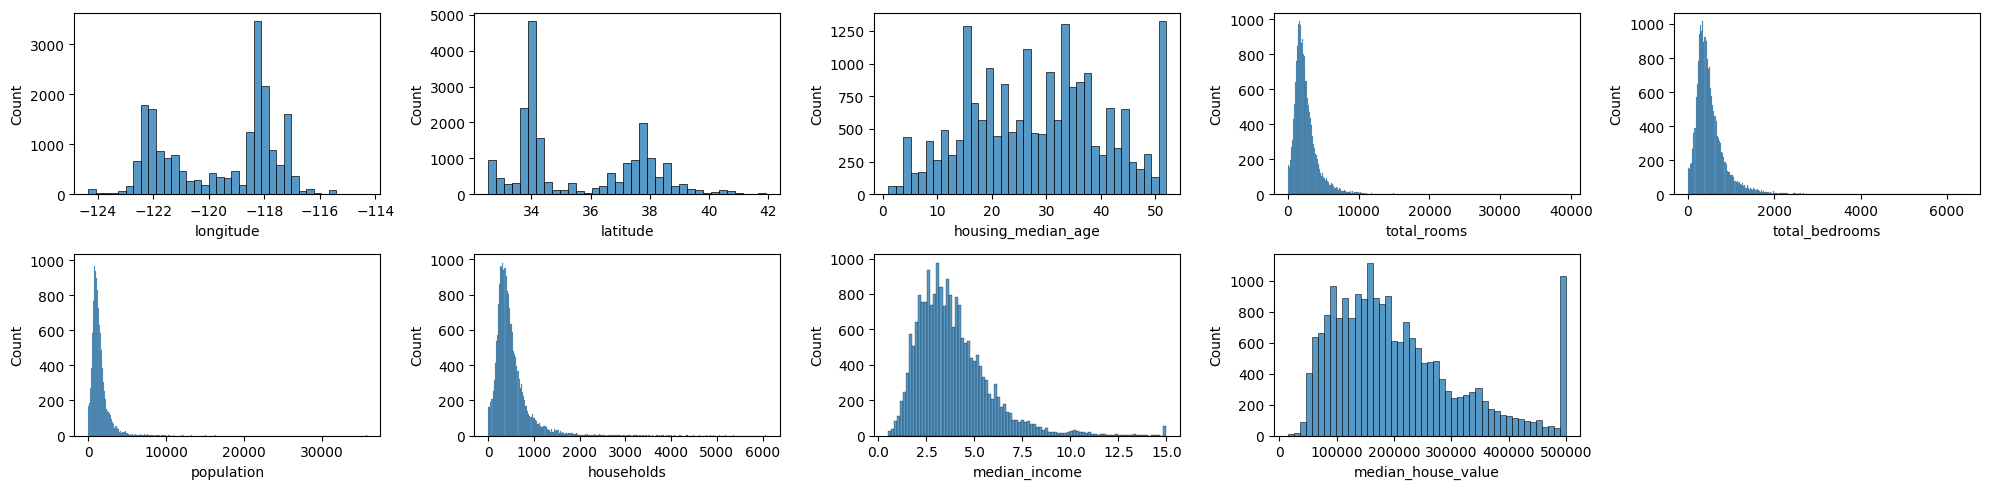

In [24]:
cols = df.columns
cols = cols.drop('ocean_proximity') # Bỏ cột dạng category

n_rows = 2
n_cols = 5

# 1. Box plot
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[column])
plt.tight_layout()

# 2. Violin plot
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.violinplot(x=df[column])
plt.tight_layout()


# 3. Histogram
plt.figure(figsize=(20,5))
for i, column in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=df[column])
plt.tight_layout()

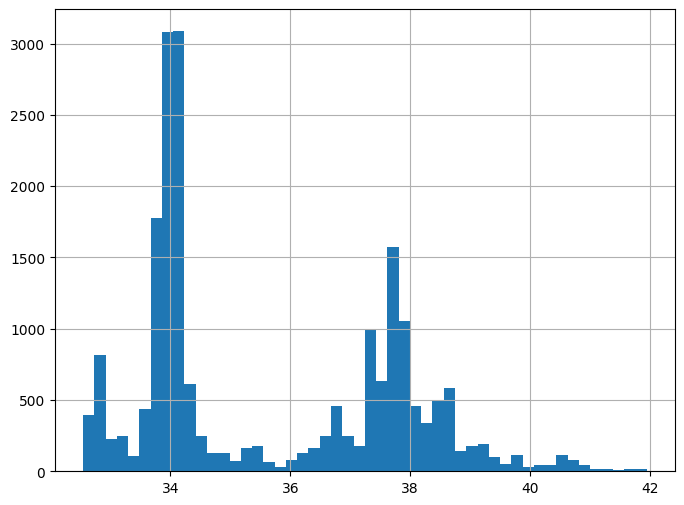

In [25]:
df['latitude'].hist(bins=50, figsize=(8, 6));

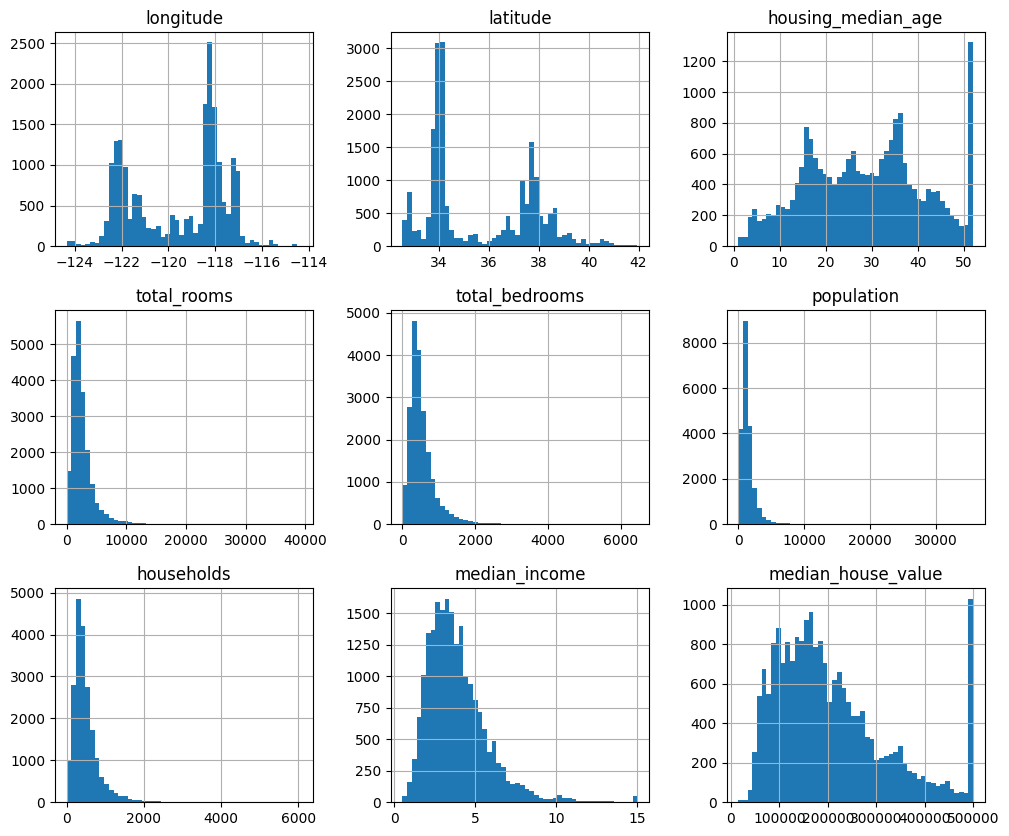

In [26]:
df.hist(bins=50, figsize=(12, 10));

**Nhận xét**:
* Dựa vào các đồ thị của `longtitude` (kinh độ) và `latitude` (vĩ độ), ta thấy có hai khu vực địa lý tập trung nhiều điểm dữ liệu. Khả năng đây là hai khu thành phố lớn với nhiều đô thị vệ tinh. Với hiểu biết về California, ta có thể dự đoán đây là San Francisco và Los Angeles.
* Cột `housing_median_age` và `median_house_value` có bin cuối cùng (giá trị lớn nhất) cao hơn hơn hẳn các bin gần đó. Chứng tỏ dữ liệu đã được tiền xử lý. Các giá trị quá lớn (ngoại lệ) đã bị cắt ngọn (clip). Tức là các giá trị lớn này được chuyển thành giá trị tại điểm bị cắt.
* Các cột `total_rooms`, `total_bedrooms`, `population`, `households` có hầu hết giá trị tập trung ở các bin đầu tiên, phần các bin sau rất dài nhưng có ít giá trị. Phân phối dữ liệu mà dữ liệu tập trung về một phía được gọi là "đuôi dài" (long tail) hay lệch (skewed). Các phân phối trong trường hợp này đều ở dạng lệch phải (right-skewed distribution). Ở đây lệch phải không phải dữ liệu chủ yếu ở bên phải, mà là giá trị trung bình (mean) sẽ nằm ở bên phải so với mode (đỉnh của histogram). Tương tự với lệch trái

# Minh hoạ độ tương quan

Các histogram ở trên chỉ cho chúng ta thấy phân phối của từng trường dữ liệu. Một cách hữu ích khác là minh họa độ tương quan giữa các trường dữ liệu để tìm những trường quan trọng có khả năng mang lại kết quả cao khi xây dựng mô hình.

Minh họa độ tương quan giữa các cột median_income, population, housing_median_age và cột nhãn median_house_value.

<Figure size 800x600 with 0 Axes>

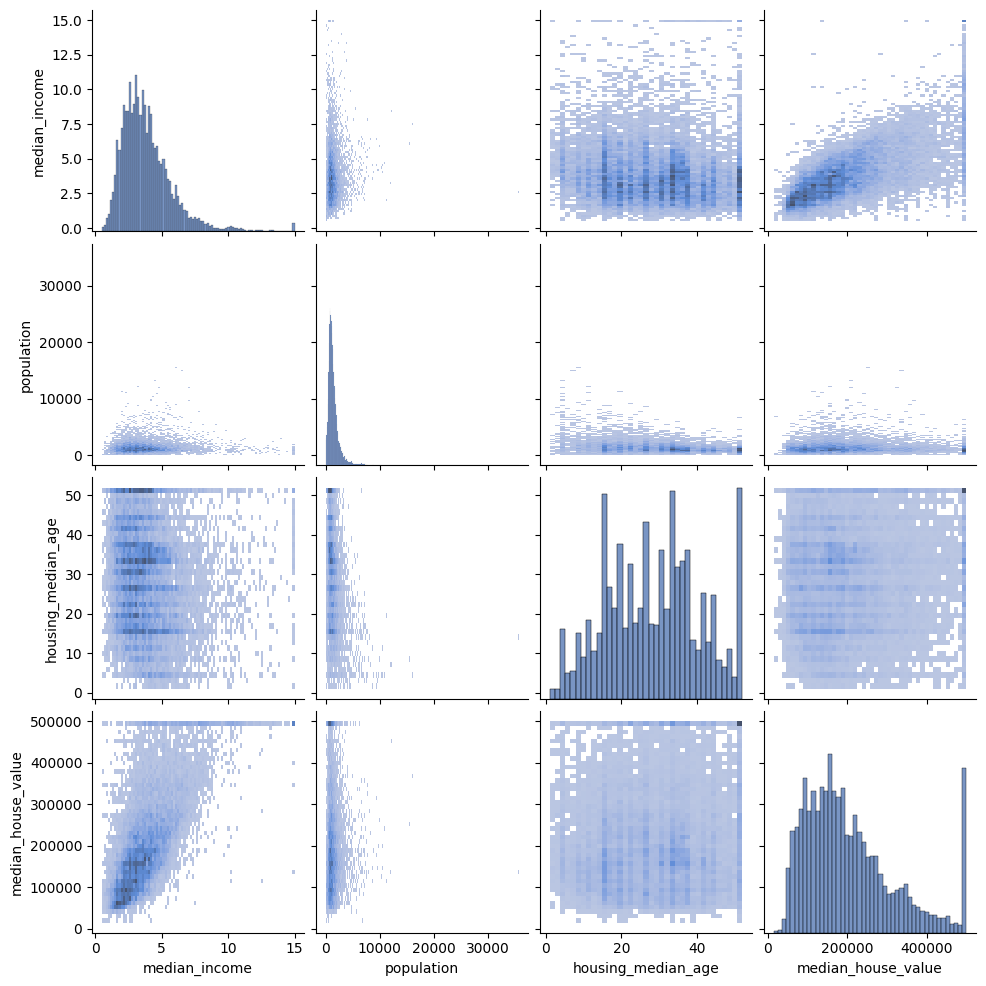

In [27]:
columns = ["median_income", "population", "housing_median_age", "median_house_value"]
plot_kws={"s": 1}
plt.figure(figsize=(8, 6))
sns.set_palette("deep")
sns.pairplot(df[columns], kind="hist");

<ipython-input-28-c48086b53932>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x="median_house_value", y="median_income", cbar=True, palette="deep")


<Axes: xlabel='median_house_value', ylabel='median_income'>

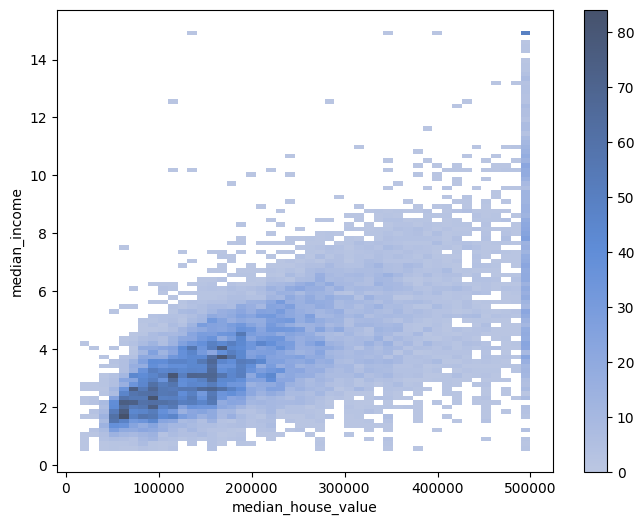

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="median_house_value", y="median_income", cbar=True, palette="deep")

<Axes: xlabel='median_house_value', ylabel='median_income'>

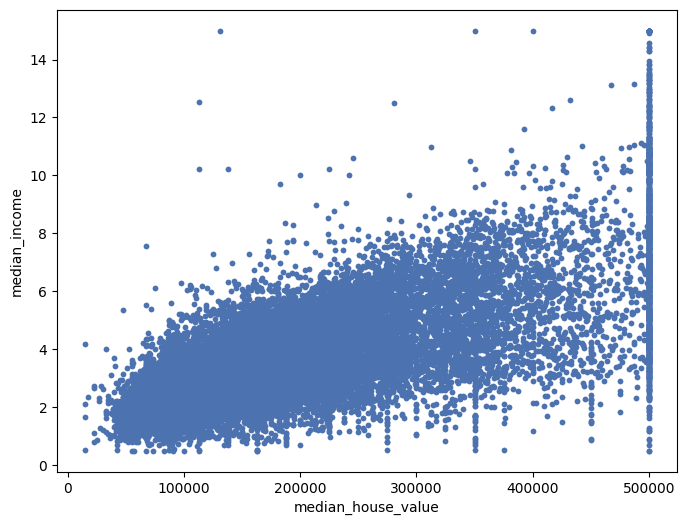

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="median_house_value", y="median_income", marker=".", s=70, linewidth=0)

Ở đây, ta quan sát thấy rằng các khu vực có thu nhập trung vị cao (median_income cao) có xu hướng có giá cao hơn. Sự thật là việc này không hoàn toàn đúng khi ở phần sát biên phải, giá nhà ở mức cao nhất nhưng thu nhập trung vị trải dài từ gần thấp nhất tới gần cao nhất. Tuy nhiên, phần lớn dữ liệu tuân theo quy luật thu nhập tăng thì giá nhà tăng. Thêm nữa, ta có vài quan sát khác:

1.   Các điểm dữ liệu chủ yếu nằm trong phần phía dưới trái, mật độ các điểm ở các ô còn lại khá thưa.
2.   Ngoài cột tương ứng với giá nhà cao nhất, có khá nhiều các "cột" với các căn nhà có giá giống nhau. Nguyên nhân khi bán nhà thường làm tròn. Một số giá nhà phổ biến là 280k, 350k, 450k và 500k).
3. Khu vực có thu nhập thấp vẫn có nhiều căn nhà đắt tiền (phần dưới bên phải) hơn số lượng căn nhà có giá trị thấp ở khu vực có thu nhập cao (phần trên bên trái).






[Text(0.5, 1.0, 'Most common house prices'),
 Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'House Price')]

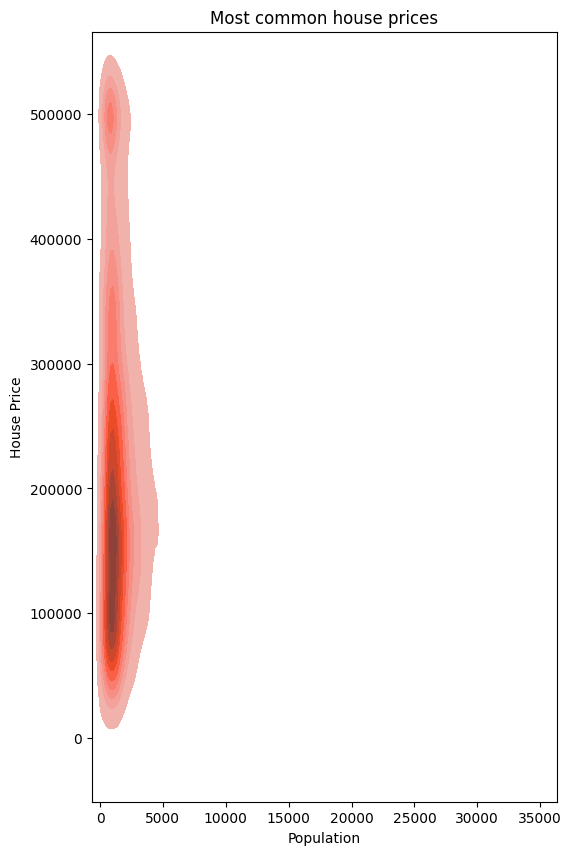

In [30]:
plt.figure(figsize=(6, 10))

sns.kdeplot(data=df, x='population', y='median_house_value', fill="True", color="salmon").set(
    title = "Most common house prices",
    xlabel = "Population",
    ylabel = "House Price"
)

Có thể thấy giá nhà tập trung ở khoảng từ 50k USD đến 280k USD

# Minh họa trên bản đồ

<Axes: xlabel='longitude', ylabel='latitude'>

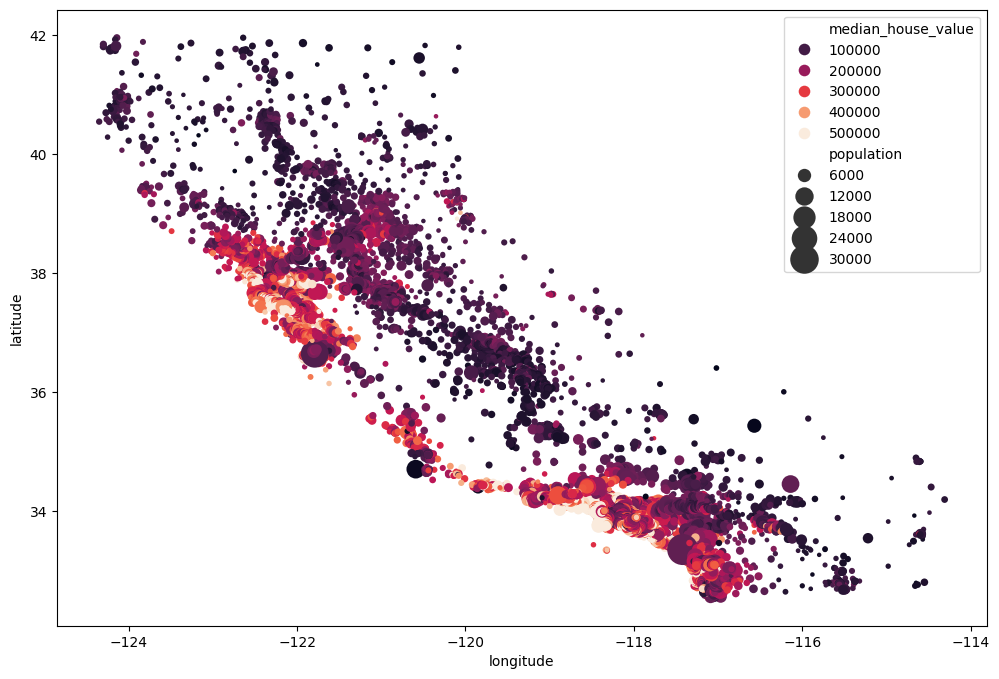

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="longitude", y="latitude", size="population", sizes=(10, 500), hue="median_house_value", s=70, linewidth=0, palette="rocket") # palette="YlOrBr"

In [32]:
df1 = df.sort_values(by="population")
df2 = df.sort_values(by="median_house_value")

<Axes: xlabel='longitude', ylabel='latitude'>

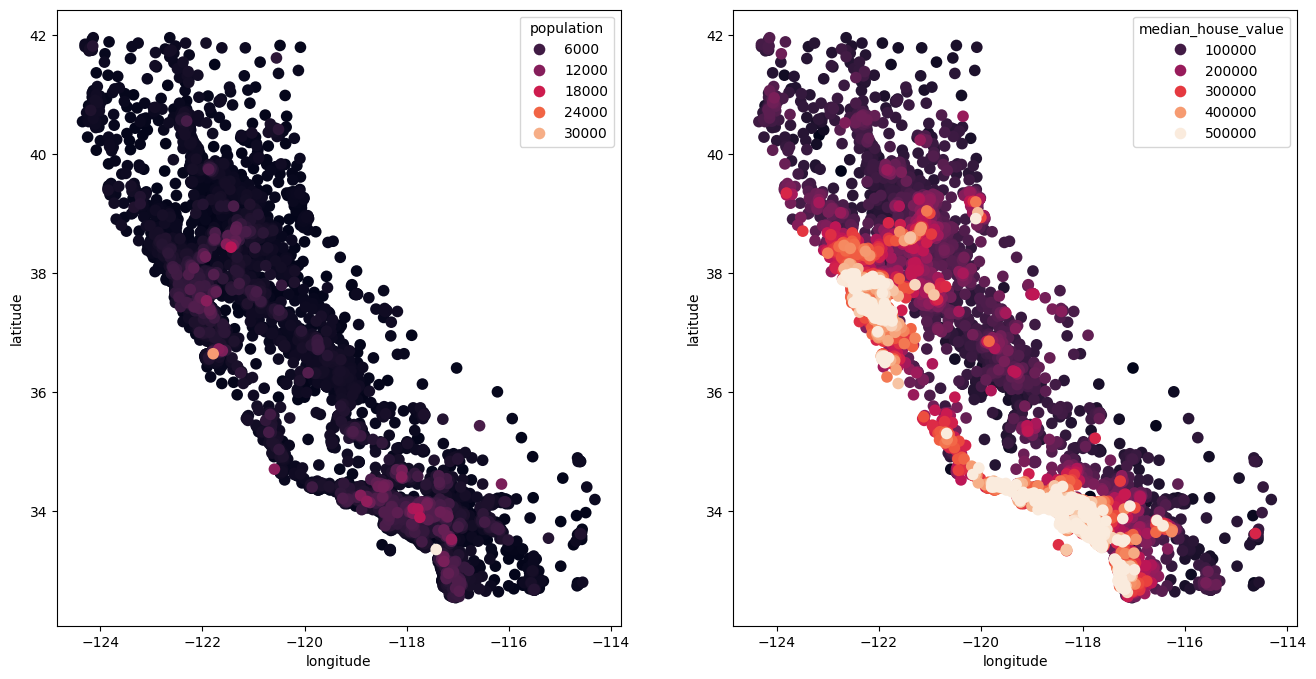

In [33]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(data=df1, x="longitude", y="latitude", hue="population", s=70, linewidth=0, palette="rocket")

plt.subplot(1,2,2)
sns.scatterplot(data=df2, x="longitude", y="latitude", hue="median_house_value", s=70, linewidth=0, palette="rocket") # palette="YlOrBr"

Trong bản đồ trên, mỗi hình tròn tương ứng với một điểm dữ liệu với bán kính thể hiện số dân (cột population) và màu sắc thể hiện giá nhà. Chúng ta thấy rằng có hai cụm dân cư lớn ở ven biển với mức giá nhà rất cao.

Minh hoạ trực tiếp trên map:

**Bản đồ mật độ dân số California:**

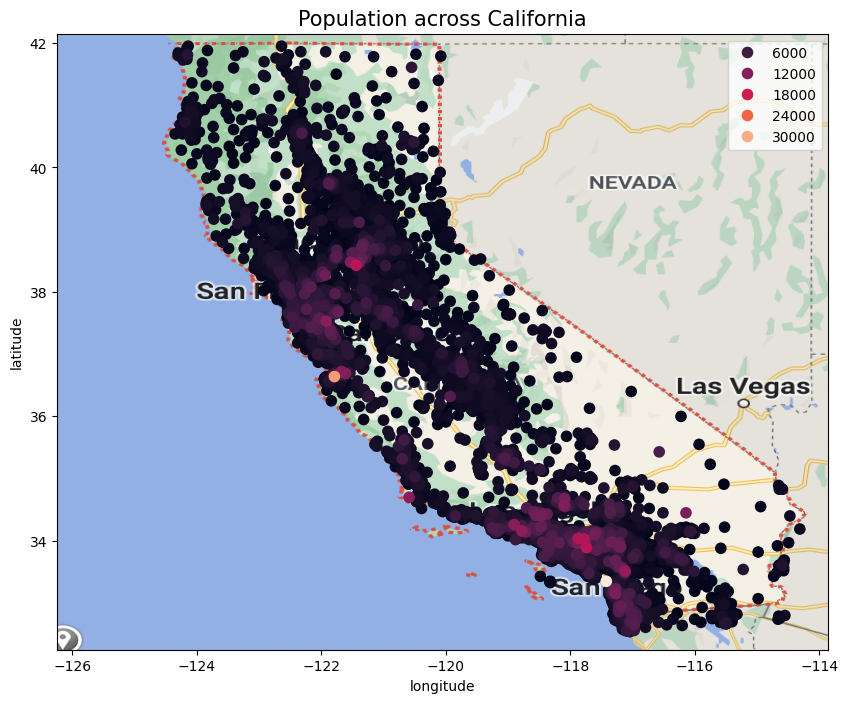

In [34]:
california_img = plt.imread('/content/ggdrive/MyDrive/Data Analyst/Python/Project/cali_map.png')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x="longitude", y="latitude", hue="population", s=70, linewidth=0, palette="rocket")

plt.imshow(california_img, extent=[-126.25, -113.85, 32.25, 42.15], alpha=1)
plt.title('Population across California',fontsize=15)
plt.legend()
plt.show()

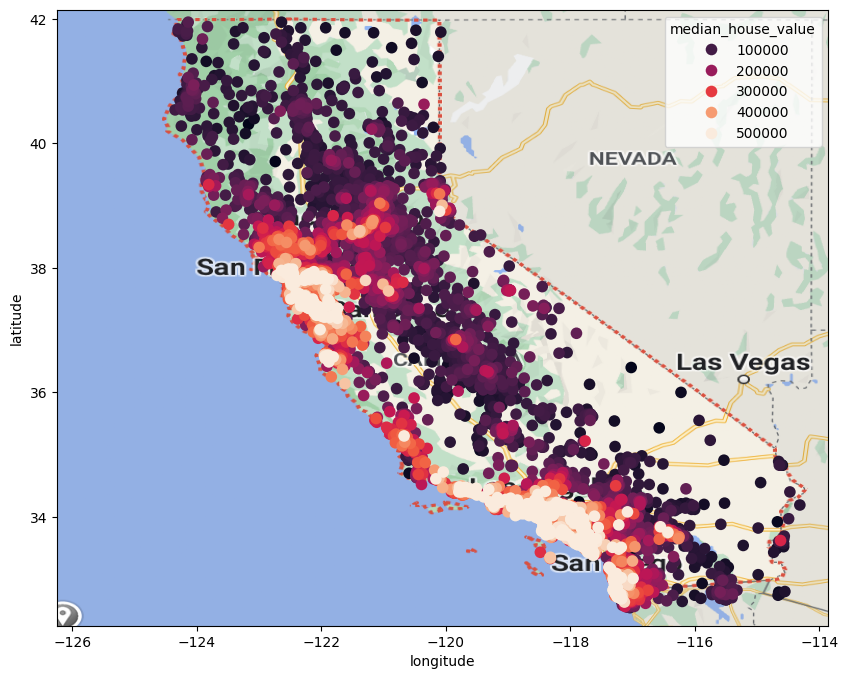

In [35]:
california_img = plt.imread('/content/ggdrive/MyDrive/Data Analyst/Python/Project/cali_map.png')

plt.figure(figsize=(12, 8))
plt.imshow(california_img, extent=[-126.25, -113.85, 32.25, 42.15], alpha=1)
sns.scatterplot(data=df2, x="longitude", y="latitude", hue="median_house_value", s=70, linewidth=0, palette="rocket")
plt.show()

Ta thấy rằng két quả này hoàn toàn hợp lý. Khu vực San Francisco ở phía bắc và Los Angeles ở phía nam thực sự là các khu dân cư lớn với giá nhà đắt đỏ. Dữ liệu được lấy từ năm 1990 nhưng tới giờ vẫn giữ nguyên tính chất đặc thù.

Minh họa ngoài việc giúp chúng ta hiểu sâu thêm về dữ liệu còn giúp chúng ta kiểm định xem dữ liệu có gì bất thường không.

# Thực hiện K-mean

## Đọc dữ liệu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

housing_df = pd.read_csv('/content/ggdrive/MyDrive/Data Analyst/Python/Project/housing_ca.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Bốn đặc trưng tiềm năng nhất là population, housing_median_age, median_income, median_house_value

Trước tiên, cần xem mối quan hệ giữa chúng nhờ pair plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

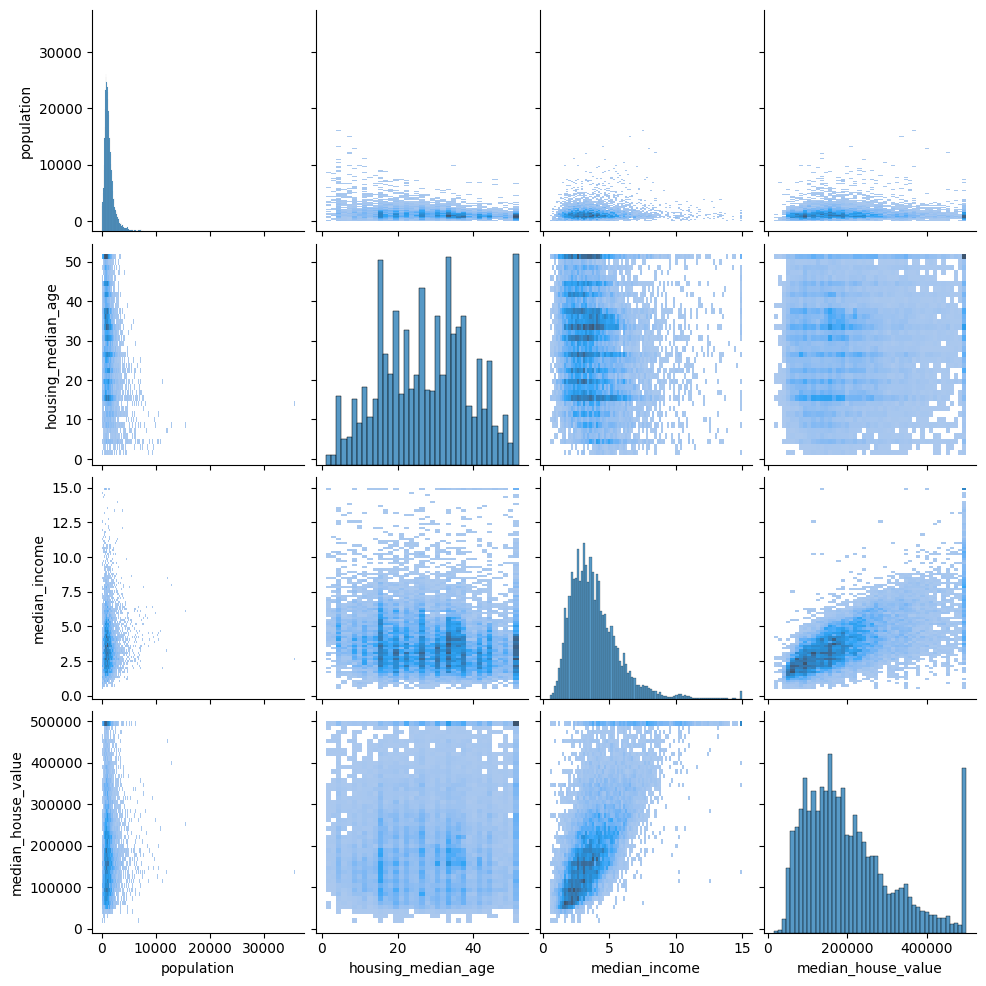

In [4]:
sns.pairplot(housing_df[['population','housing_median_age','median_income','median_house_value']], kind="hist", palette="deep")

Ta cần chọn ra 1 số features để thực hiện phân cụm với K-means. Với phân bố trên, ta có thể chọn population và median_income làm 2 đặc trưng.

Có thể thử với nhiều cặp đặc trưng khác nhau. Cần thử cho đến khi tìm được các đặc trưng giúp việc phân cụm có ý nghĩa nhất

Nếu chọn ra >2 đặc trưng để tiến hành phân cụm, sẽ khó visualize các cụm để hiểu ý nghĩa của từng cụm

Cũng có thể chọn 1 đặc trưng để phân cụm (VD population, median income, ...). Nhưng thay vì làm như vậy, ta có thể dùng scatter plot với tham số hue để trực quan hóa cho nhanh

## Hai đặc trưng được chọn là median_income và population

### Tách dữ liệu

In [5]:
x = housing_df.loc[:, ['median_income', 'population']].values
x

array([[8.3252e+00, 3.2200e+02],
       [8.3014e+00, 2.4010e+03],
       [7.2574e+00, 4.9600e+02],
       ...,
       [1.7000e+00, 1.0070e+03],
       [1.8672e+00, 7.4100e+02],
       [2.3886e+00, 1.3870e+03]])

###Scale dữ liệu

In [8]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 2.34476576, -0.9744286 ],
       [ 2.33223796,  0.86143887],
       [ 1.7826994 , -0.82077735],
       ...,
       [-1.14259331, -0.3695372 ],
       [-1.05458292, -0.60442933],
       [-0.78012947, -0.03397701]])

###Phân cụm với phương pháp elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

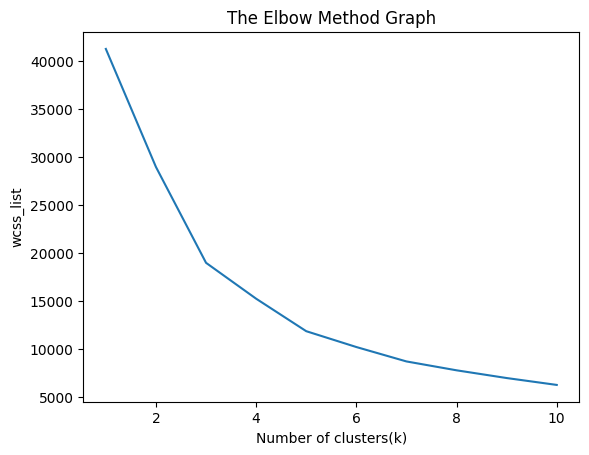

In [11]:
from sklearn.cluster import KMeans
wcss_list = []

#Thử với K = 1 đến 10
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) #Khởi tạo mô hình
  kmeans.fit(x_scaled) #Huấn luyện
  wcss_list.append(kmeans.inertia_) #Tính WCSS

plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

Theo biểu đồ trên, ta chọn điểm elbow là K=5

##Huấn luyện mô hình

In [13]:
K=5

kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42) #Khởi tạo mô hình

kmeans.fit(x_scaled) # Huấn luyện

y_predict = kmeans.predict(x_scaled) # Dự đoán

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Trực quan hóa kết quả

Trực quan hóa việc phân cụm

<ipython-input-14-770b8b7d4662>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y_predict == i, 0], x[y_predict == i, 1], s = 15, c = colors[i], label = f'Cluster {i+1}')


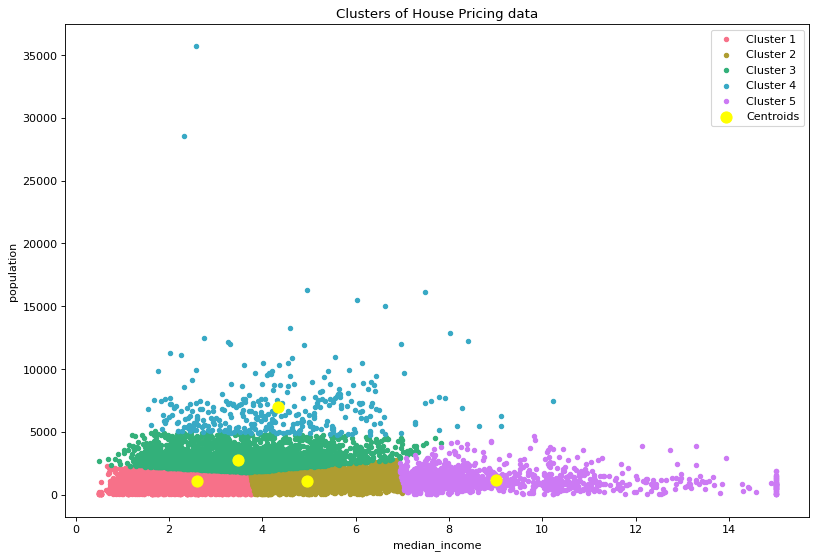

In [14]:
plt.figure(figsize=(12, 8), dpi=80)

colors= sns.color_palette("husl", K) # Tạo ra K màu
for i in range(K):
  plt.scatter(x[y_predict == i, 0], x[y_predict == i, 1], s = 15, c = colors[i], label = f'Cluster {i+1}')


kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_) # Tính lại tâm
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids') # Vẽ các tâm

plt.title('Clusters of House Pricing data')
plt.xlabel('median_income')
plt.ylabel('population')
plt.legend()
plt.show()

**Nhận xét**: KMeans chia dữ liệu làm 5 cụm

* Cụm 1: thu nhập thấp, mật độ dân số thấp
* Cụm 2: thu nhập trung bình, mật độ dân số thấp
* Cụm 3: thu nhập thấp và trung bình, mật độ dân số trung bình
* Cụm 4: thu trung thấp và trung bình, mật độ dân số cao
* Cụm 5: thu nhập cao, mật độ dân số thấp

### Trực quan hóa các cụm trên bản đồ

<Axes: xlabel='longitude', ylabel='latitude'>

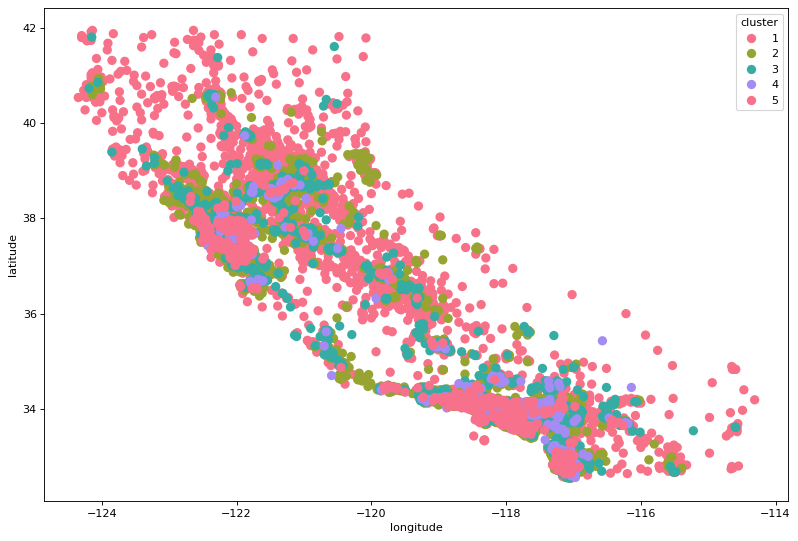

In [15]:
housing_df['cluster'] = y_predict + 1
tmp_df = housing_df.sort_values(by="cluster")

plt.figure(figsize=(12, 8), dpi=80)
sns.scatterplot(data=tmp_df, x='longitude', y='latitude', hue='cluster', s=70, linewidth=0, palette="husl")

Hiển thị tất cả các cụm trên bản đồ sẽ hơi khó nhìn. Ta sẽ tách riêng từng cụm

<ipython-input-16-e7221378e255>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df['cluster']==i], x='longitude', y='latitude', color=colors[i-1], s=10, linewidth=0, palette="rocket")
<ipython-input-16-e7221378e255>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df['cluster']==i], x='longitude', y='latitude', color=colors[i-1], s=10, linewidth=0, palette="rocket")
<ipython-input-16-e7221378e255>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df['cluster']==i], x='longitude', y='latitude', color=colors[i-1], s=10, linewidth=0, palette="rocket")
<ipython-input-16-e7221378e255>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df['cluster']==i], x='longitude', y='latitude', color=colors[i-1], s=10, linewidth=0, palette="rocket")


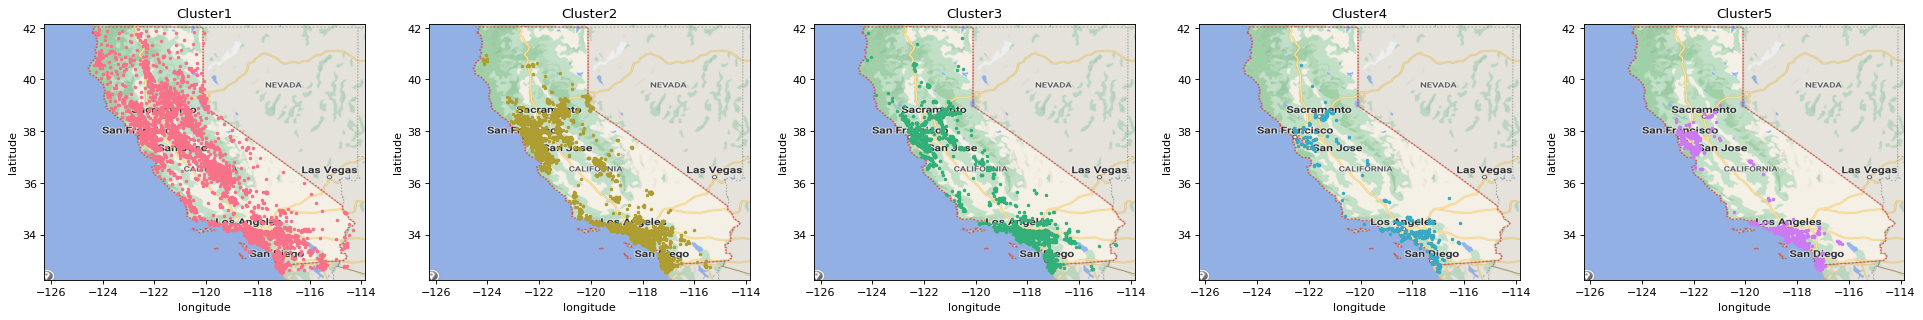

In [16]:
plt.figure(figsize=(30, 8), dpi=80)

california_img = plt.imread('/content/ggdrive/MyDrive/Data Analyst/Python/Project/cali_map.png')
colors= sns.color_palette("husl", K) # Tạo ra K màu

for i in range(1, K+1):
  plt.subplot(1, K, i)
  sns.scatterplot(data=tmp_df[tmp_df['cluster']==i], x='longitude', y='latitude', color=colors[i-1], s=10, linewidth=0, palette="rocket")
  plt.title(f"Cluster{i}")
  plt.imshow(california_img, extent=[-126.25, -113.85, 32.25, 42.15], alpha=1)


**Nhận xét**:

* Cụm 1 (dân số đông, thu nhập thấp) phân bố rộng khắp
* Cụm 2 (dân số đông, thu nhập trung bình) phân bố ở Scramento, San Francisco, San Jose, LA, và San Diego
* Cụm 3: (thu nhập thấp và trung bình, mật độ dân số trung bình) phân bố ở Scramento, San Francisco, San Jose, LA, và San Diego
* Cụm 4: (thu trung thấp và trung bình, mật độ dân số cao) phân bố ít, chủ yếu ở quanh vùng LA, và San Diego, Scramento, San Francisco
* Cụm 5: (thu nhập cao, mật độ dân số thấp) phân bố tập trung vào khu vực LA, San Diego, San Francisco và San Jose